## Import all the necessary libraries and connect to MySQL

In [1]:
# Importing necessary libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Set2_3
from palettable.colorbrewer.qualitative import Set3_3
from palettable.colorbrewer.qualitative import Pastel2_3
from palettable.colorbrewer.qualitative import Pastel1_3
from wordcloud import WordCloud, STOPWORDS


# Connection with MySQL
db = mysql.connector.connect(host="localhost", user="root", password="12345678", database="cryptocurrency")
cur = db.cursor(buffered=True) #create a cursor object

## Data Preproccessing

In [2]:
# Firstly we store the data in α pandas dataframe. We create one dataframe that contains all the tweets and dataframes
# that contain each hashtag seperately.
# So in the sequel, we can use the appropriate dataset for each task.

df=pd.read_sql("Select * from tweets",con=db)
df_bitcoin=pd.read_sql("Select * from tweets where hashtags LIKE '%Bitcoin%';",con=db)
df_ethereum=pd.read_sql("Select * from tweets where hashtags LIKE '%Ethereum%';",con=db)
df_bnb=pd.read_sql("Select * from tweets where hashtags LIKE '%BNB%';",con=db)


# We apply the following function to remove the extra spaces from the text from all the datasets

def func(string):
    string1=re.sub(r"^\s+|\s+$", "", string)
    string2=string1.lower()
    return string2

df['text']=df['text'].apply(func)
df_bitcoin['text']=df_bitcoin['text'].apply(func)
df_ethereum['text']=df_ethereum['text'].apply(func)
df_bnb['text']=df_bnb['text'].apply(func)

In [3]:
# There are many duplicates in our dataset. So we keep only the unique tweets.

# Remove duplicates
df=df.drop_duplicates(subset ="text",keep = 'first', inplace = False)
df_bitcoin=df_bitcoin.drop_duplicates(subset ="text",keep = 'first', inplace = False)
df_ethereum=df_ethereum.drop_duplicates(subset ="text",keep = 'first', inplace = False)
df_bnb=df_bnb.drop_duplicates(subset ="text",keep = 'first', inplace = False)

# Convert the datetime into date format. Datetime is not appropriate for our analysis
df['date'] = pd.to_datetime(df['date']).dt.date 
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date']).dt.date 
df_ethereum['date'] = pd.to_datetime(df_ethereum['date']).dt.date 
df_bnb['date'] = pd.to_datetime(df_bnb['date']).dt.date 

# Remove ID 
df=df.drop(['ID'], axis=1) 
df_bitcoin=df_bitcoin.drop(['ID'], axis=1)
df_ethereum=df_ethereum.drop(['ID'], axis=1) 
df_bnb=df_bnb.drop(['ID'], axis=1) 

In [4]:
# How many tweets we have for each hashtag

print(df.shape) # tweets in total
print(df_bitcoin.shape) # tweets with hastag Bitcoin
print(df_ethereum.shape) # tweets with hastag Ethereum
print(df_bnb.shape) # # tweets with hastag Bnb

(3707, 12)
(1762, 12)
(1452, 12)
(1073, 12)


## Sentiment Analysis and Visualizations

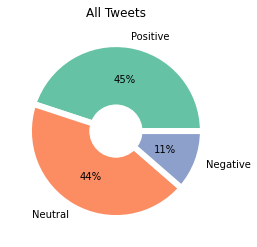

In [5]:
# Plot the sentiment of all the  tweets

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df['sentiment'].value_counts(),labels=df['sentiment'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Set2_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('All Tweets')
plt.show()

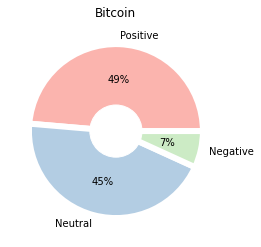

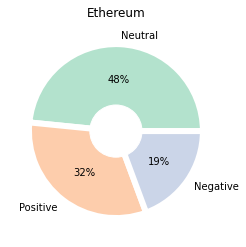

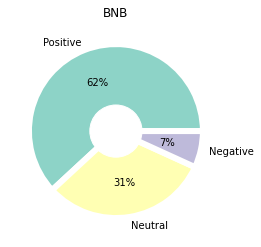

In [6]:
# Plot the sentiment for Bitcoin

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df_bitcoin['sentiment'].value_counts(),labels=df_bitcoin['sentiment'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Pastel1_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Bitcoin')
plt.show()

# Plot the sentiment for Ethereum

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df_ethereum['sentiment'].value_counts(),labels=df_ethereum['sentiment'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Pastel2_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Ethereum')
plt.show()

# Plot the sentiment for Bnb

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df_bnb['sentiment'].value_counts(),labels=df_bnb['sentiment'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Set3_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('BNB')
plt.show()

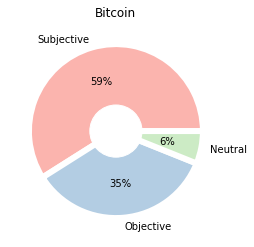

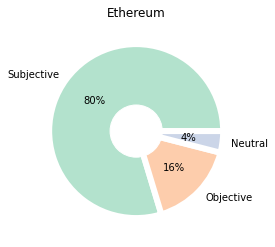

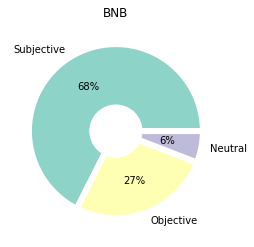

In [7]:
# Plot the subjectivity for Bitcoin

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df_bitcoin['subjectivity'].value_counts(),labels=df_bitcoin['subjectivity'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Pastel1_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Bitcoin')
plt.show()

# Plot the subjectivity for Ethereum

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df_ethereum['subjectivity'].value_counts(),labels=df_ethereum['subjectivity'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Pastel2_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Ethereum')
plt.show()

# Plot the subjectivity for Bnb

my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(df_bnb['subjectivity'].value_counts(),labels=df_bnb['subjectivity'].value_counts().index, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white'}, autopct='%1.0f%%',colors=Set3_3.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('BNB')
plt.show()

In [8]:
## WordCloud: Contains popular keywords which are used frequently

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = ''):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(5, 5))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

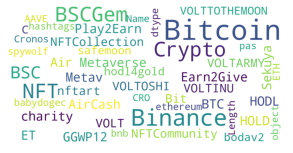

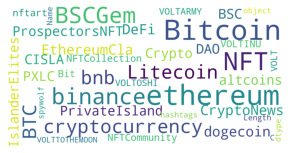

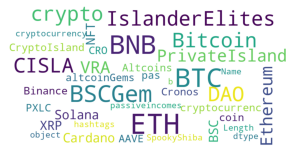

In [9]:
## We examine which are the most frequent hashtags for every crypto

#show_wordcloud(df['hashtags'])
show_wordcloud(df_bitcoin['hashtags']) # most common hashtags in thw tweets that contain the hashtag Bitcoin
show_wordcloud(df_ethereum['hashtags']) # most common hashtags in thw tweets that contain the hashtag Ethereum
show_wordcloud(df_bnb['hashtags']) # most common hashtags in thw tweets that contain the hashtag Bnb

## Sentiment about all cryptocurrencies by time

<AxesSubplot:xlabel='sentiment', ylabel='date'>

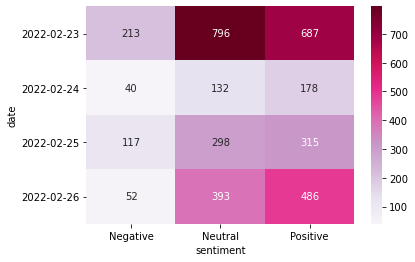

In [10]:
crosstb=pd.crosstab(df['date'],df['sentiment'])
sns.heatmap(crosstb, cmap="PuRd", annot=True, cbar=True,fmt="d")

## Sentiment about each cryptocurrency by time

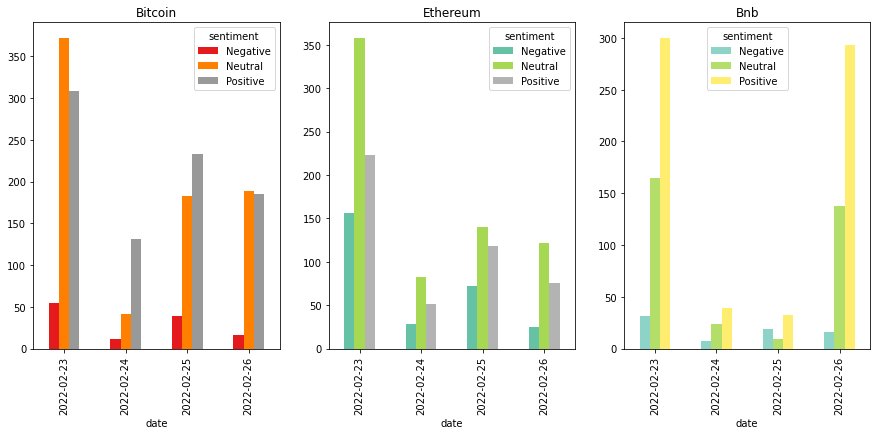

In [11]:
crosstb_bitcoin_date_sentiment = pd.crosstab(df_bitcoin['date'],df_bitcoin['sentiment'])
crosstb_ethereum_date_sentiment = pd.crosstab(df_ethereum['date'],df_ethereum['sentiment'])
crosstb_bnb_date_sentiment = pd.crosstab(df_bnb['date'],df_bnb['sentiment'])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,6))
barplot_bitcoin = crosstb_bitcoin_date_sentiment.plot.bar(cmap="Set1",ax=ax1)
barplot_ethereum = crosstb_ethereum_date_sentiment.plot.bar(cmap="Set2",ax=ax2)
barplot_bnb = crosstb_bnb_date_sentiment.plot.bar(cmap="Set3",ax=ax3)

barplot_bitcoin.title.set_text('Bitcoin')
barplot_ethereum.title.set_text('Ethereum')
barplot_bnb.title.set_text('Bnb')

## Subjectivity about all cryptocurrencies in relation with the sentiment

<AxesSubplot:xlabel='subjectivity', ylabel='sentiment'>

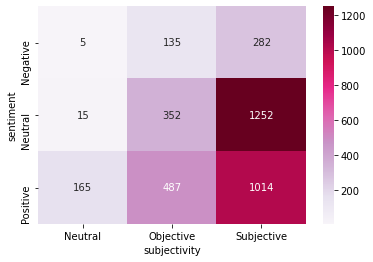

In [12]:
crosstb=pd.crosstab(df['sentiment'],df['subjectivity'])
sns.heatmap(crosstb, cmap="PuRd", annot=True, cbar=True,fmt="d")

## Subjectivity about each cryptocurrency in relation with the sentiment

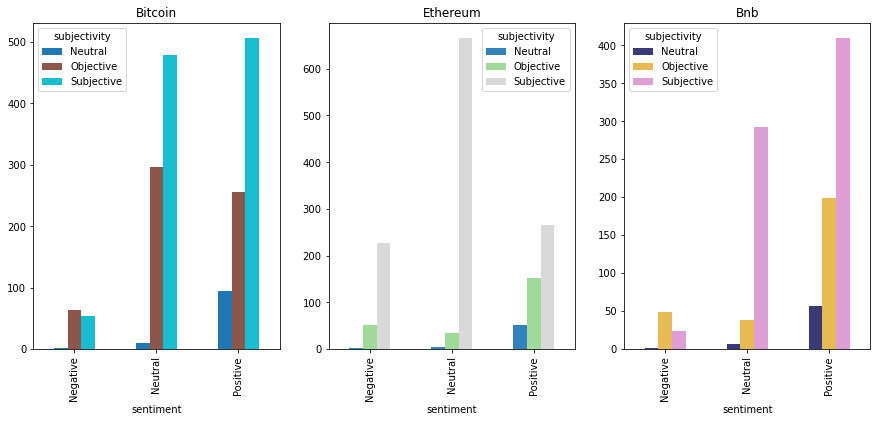

In [13]:
crosstb_bitcoin_subjectivity_sentiment = pd.crosstab(df_bitcoin['sentiment'],df_bitcoin['subjectivity'])
crosstb_ethereum_subjectivity_sentiment = pd.crosstab(df_ethereum['sentiment'],df_ethereum['subjectivity'])
crosstb_bnb_subjectivity_sentiment = pd.crosstab(df_bnb['sentiment'],df_bnb['subjectivity'])


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,6))
barplot_bitcoin = crosstb_bitcoin_subjectivity_sentiment.plot.bar(cmap="tab10",ax=ax1)
barplot_ethereum = crosstb_ethereum_subjectivity_sentiment.plot.bar(cmap="tab20c",ax=ax2)
barplot_bnb = crosstb_bnb_subjectivity_sentiment.plot.bar(cmap="tab20b",ax=ax3)

barplot_bitcoin.title.set_text('Bitcoin')
barplot_ethereum.title.set_text('Ethereum')
barplot_bnb.title.set_text('Bnb')

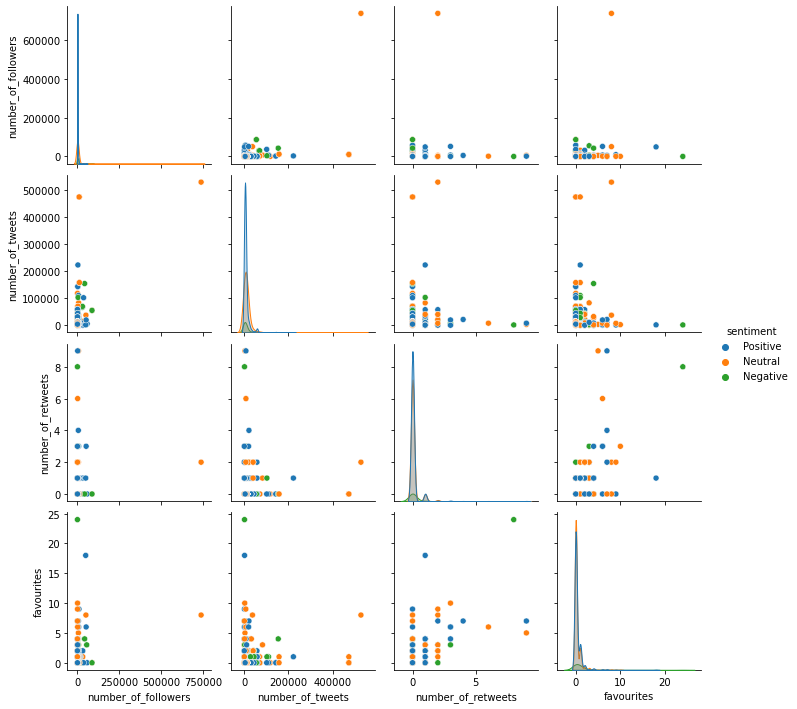

In [14]:
sns.pairplot(df_bitcoin,hue='sentiment')

## Number of tweets in relation with the sentiment

[Text(0.5, 1.0, 'Average number of tweets according to the sentiment')]

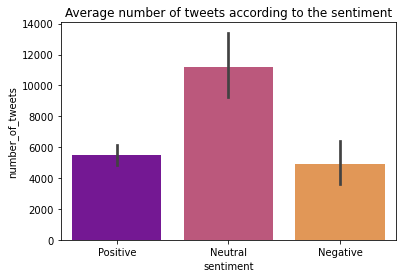

In [15]:
sns.barplot(x =df['sentiment'], y =df['number_of_tweets'], data = df, palette ='plasma').set(title='Average number of tweets according to the sentiment')

# The average number of tweets of those whose tweets are positive is about 5000
# The average number of tweets of those whose tweets are neutral is about 11000
# The average number of tweets of those whose tweets are negative is about 4000

## Number of followers in relation with and sentiment

[Text(0.5, 1.0, 'Average number of followers according to the sentiment')]

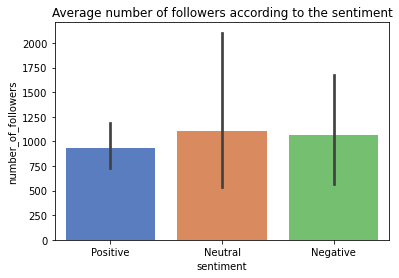

In [16]:
sns.barplot(x =df['sentiment'], y =df['number_of_followers'], data = df, palette ='muted').set(title='Average number of followers according to the sentiment')

## Number of followers in relation with  subjectivity

[Text(0.5, 1.0, 'Average number of followers according to the subjectivity')]

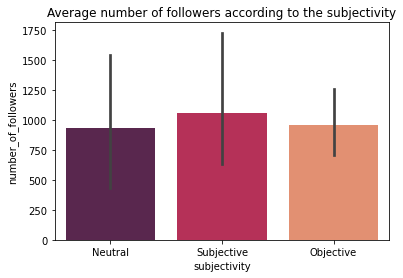

In [17]:
sns.barplot(x =df['subjectivity'], y =df['number_of_followers'], data = df, palette ='rocket').set(title='Average number of followers according to the subjectivity')